In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import skfuzzy
from skfuzzy import control as ctrl
import warnings

In [25]:
warnings.filterwarnings('ignore')

# Carga de datos

In [21]:
datos = pd.read_csv("fuzzydata.csv", sep = ';')
datos.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   57782  Female   34                1         39.0                   1   
1  286811  Female   55                1         28.0                   0   
2  117823    Male   39                1         28.0                   1   
3  213992    Male   28                1         50.0                   1   
4  324756  Female   24                1         10.0                   0   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  
0    1-2 Year             No           38244                 124.0      146  
1   > 2 Years            Yes           37577                 122.0      109  
2    1-2 Year             No           24578                  26.0       63  
3    1-2 Year             No           40507                   8.0      129  
4    < 1 Year            Yes           36783                 152.0      201

In [22]:
datos = datos[['Age', 'Vintage', 'Annual_Premium']]
datos.rename(columns = {'Age':'Edad', 'Vintage':'Antiguedad', 'Annual_Premium':'Prima'}, inplace = True)

datos.head()

Edad  Antiguedad  Prima
0    34         146  38244
1    55         109  37577
2    39          63  24578
3    28         129  40507
4    24         201  36783

## Edad

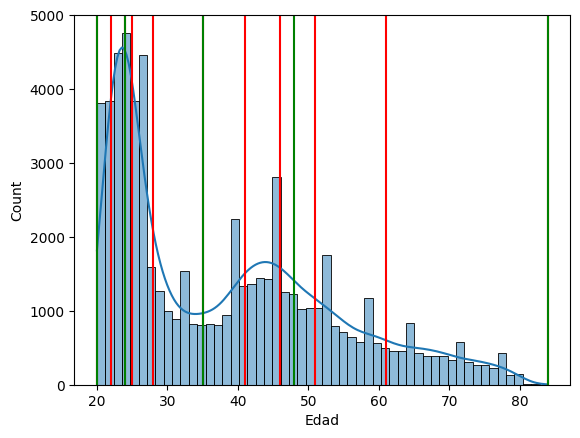

In [61]:
percentil_edad = []
for i in range(0, 110, 10):
    percentil_edad.append(np.percentile(datos.Edad, i))

cuartil_edad = []
for i in [0, 0.25, 0.5, 0.75, 1]:
    cuartil_edad.append(np.quantile(datos.Edad, i))
    
sb.histplot(data = datos, x = 'Edad', kde = True)
for i in range(len(percentil_edad)):
    plt.axvline(x = percentil_edad[i], color = 'red')
for i in range(len(cuartil_edad)):
    plt.axvline(x = cuartil_edad[i], color = 'green')
    
plt.show()

In [62]:
print(percentil_edad)
print(cuartil_edad)

[20.0, 22.0, 24.0, 25.0, 28.0, 35.0, 41.0, 46.0, 51.0, 61.0, 84.0]
[20, 24.0, 35.0, 48.0, 84]


In [63]:
px.box(data_frame = datos, y = 'Edad')

## Antiguedad

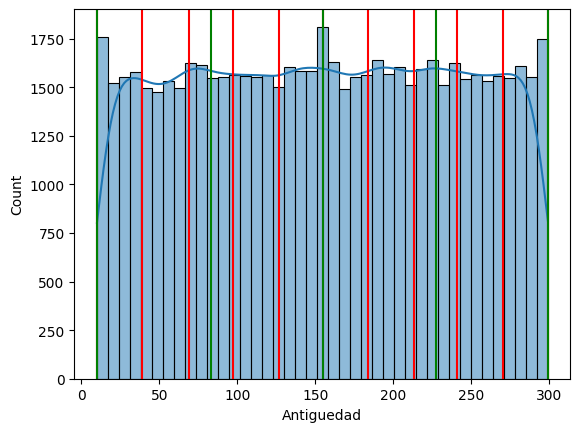

In [64]:
percentil_ant = []
for i in range(0, 110, 10):
    percentil_ant.append(np.percentile(datos.Antiguedad, i))

cuartil_ant = []
for i in [0, 0.25, 0.5, 0.75, 1]:
    cuartil_ant.append(np.quantile(datos.Antiguedad, i))
    
sb.histplot(data = datos, x = 'Antiguedad', kde = True)
for i in range(len(percentil_ant)):
    plt.axvline(x = percentil_ant[i], color = 'red')
for i in range(len(cuartil_ant)):
    plt.axvline(x = cuartil_ant[i], color = 'green')
    
plt.show()

In [65]:
print(percentil_ant)
print(cuartil_ant)

[10.0, 39.0, 69.0, 97.0, 127.0, 155.0, 184.0, 213.0, 241.0, 270.0, 299.0]
[10, 83.0, 155.0, 227.0, 299]


In [66]:
px.box(data_frame = datos, y = 'Antiguedad')

## Prima

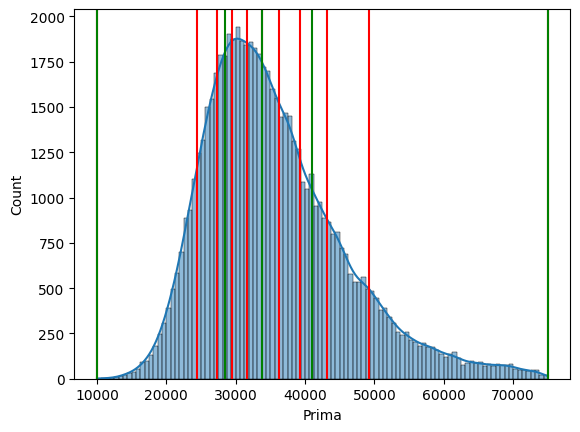

In [67]:
percentil_prima = []
for i in range(0, 110, 10):
    percentil_prima.append(np.percentile(datos.Prima, i))

cuartil_prima = []
for i in [0, 0.25, 0.5, 0.75, 1]:
    cuartil_prima.append(np.quantile(datos.Prima, i))
    
sb.histplot(data = datos, x = 'Prima', kde = True)
for i in range(len(percentil_prima)):
    plt.axvline(x = percentil_prima[i], color = 'red')
for i in range(len(cuartil_prima)):
    plt.axvline(x = cuartil_prima[i], color = 'green')
    
plt.show()

In [68]:
print(percentil_prima)
print(cuartil_prima)

[10004.0, 24460.0, 27262.4, 29483.0, 31622.800000000003, 33832.0, 36317.0, 39218.0, 43154.20000000001, 49285.20000000001, 75000.0]
[10004, 28393.5, 33832.0, 41037.0, 75000]


In [69]:
px.box(data_frame = datos, y = 'Prima')

# Motor de inferencia

1. Declarar universo del discurso

In [70]:
#Edad
edad = ctrl.Antecedent(np.arange(datos.Edad.min(), datos.Edad.max() + 1, 1), 'edad')

#Antiguedad
ant = ctrl.Antecedent(np.arange(datos.Antiguedad.min(), datos.Antiguedad.max() + 1, 1), 'antiguedad')

#Prima
prima = ctrl.Consequent(np.arange(datos.Prima.min(), datos.Prima.max() + 1, 1), 'prima')

2. Fuzzyficar antecedentes y consecuente

In [71]:
print(cuartil_edad)

[20, 24.0, 35.0, 48.0, 84]


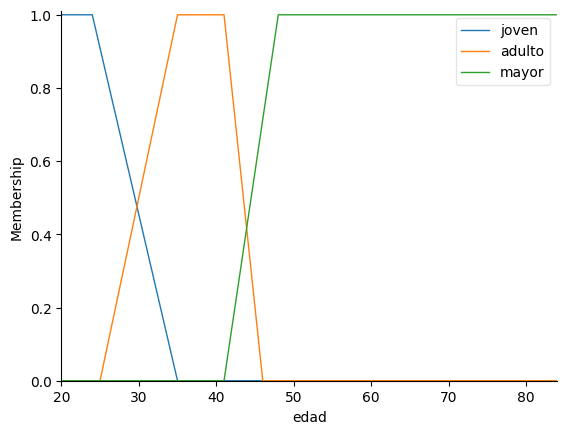

In [72]:
#Edad
edad['joven'] = skfuzzy.trapmf(edad.universe, [cuartil_edad[0], cuartil_edad[0], 
                                               cuartil_edad[1], cuartil_edad[2]])
edad['adulto'] = skfuzzy.trapmf(edad.universe, [percentil_edad[3], percentil_edad[5],
                                               percentil_edad[6], percentil_edad[7]])
edad['mayor'] = skfuzzy.trapmf(edad.universe, [percentil_edad[6], cuartil_edad[3],
                                              cuartil_edad[4], cuartil_edad[4]])
edad.view()

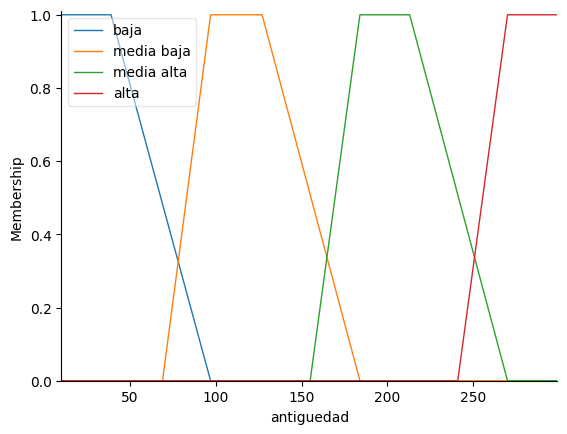

In [73]:
#Antigüedad
ant['baja'] = skfuzzy.trapmf(ant.universe, [percentil_ant[0], percentil_ant[0],
                                                         percentil_ant[1], percentil_ant[3]])
ant['media baja'] = skfuzzy.trapmf(ant.universe, [percentil_ant[2], percentil_ant[3],
                                                         percentil_ant[4], percentil_ant[6]])
ant['media alta'] = skfuzzy.trapmf(ant.universe, [percentil_ant[5], percentil_ant[6],
                                                         percentil_ant[7], percentil_ant[9]])
ant['alta'] = skfuzzy.trapmf(ant.universe, [percentil_ant[8], percentil_ant[9],
                                                         percentil_ant[10], percentil_ant[10]])
ant.view()

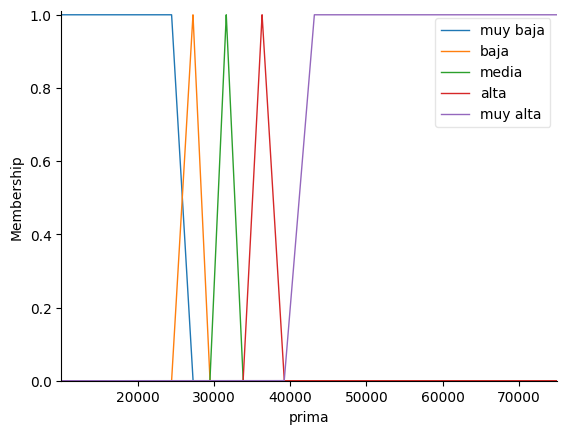

In [74]:
#Prima
prima['muy baja'] = skfuzzy.trapmf(prima.universe, [cuartil_prima[0], cuartil_prima[0], 
                                                    percentil_prima[1], percentil_prima[2]])
prima['baja'] = skfuzzy.trimf(prima.universe, [percentil_prima[1], percentil_prima[2], 
                                               percentil_prima[3]])
prima['media'] = skfuzzy.trimf(prima.universe, [percentil_prima[3], percentil_prima[4], 
                                                percentil_prima[5]])
prima['alta'] = skfuzzy.trimf(prima.universe, [percentil_prima[5], percentil_prima[6], 
                                               percentil_prima[7]])
prima['muy alta'] = skfuzzy.trapmf(prima.universe, [percentil_prima[7], percentil_prima[8], 
                                                    cuartil_prima[4], cuartil_prima[4]])
prima.view()

In [75]:
regla1 = ctrl.Rule(edad['joven'] & ant['baja'], prima['muy alta'])
regla2 = ctrl.Rule(edad['joven'] & ant['media baja'], prima['alta'])
regla3 = ctrl.Rule(edad['joven'] & ant['media alta'], prima['media'])
regla4 = ctrl.Rule(edad['joven'] & ant['alta'], prima['media'])
regla5 = ctrl.Rule(edad['adulto'] & ant['baja'], prima['media'])
regla6 = ctrl.Rule(edad['adulto'] & ant['media baja'], prima['baja'])
regla7 = ctrl.Rule(edad['adulto'] & ant['media alta'], prima['muy baja'])
regla8 = ctrl.Rule(edad['adulto'] & ant['alta'], prima['muy baja'])
regla9 = ctrl.Rule(edad['mayor'] & ant['baja'], prima['muy alta'])
regla10 = ctrl.Rule(edad['mayor'] & ant['media baja'], prima['alta'])
regla11 = ctrl.Rule(edad['mayor'] & ant['media alta'], prima['media'])
regla12 = ctrl.Rule(edad['mayor'] & ant['alta'], prima['baja'])

In [76]:
calculoPrima = ctrl.ControlSystem([regla1, regla2, regla3, regla4, regla5, regla6, regla7, 
                                   regla8, regla9, regla10, regla11, regla12])

5. Utilizar el SB

In [77]:
calcularPrima = ctrl.ControlSystemSimulation(calculoPrima)
calcularPrima.input['edad'] = 40
calcularPrima.input['antiguedad'] = 120
calcularPrima.compute()
calcularPrima.output['prima']

27068.46665918474

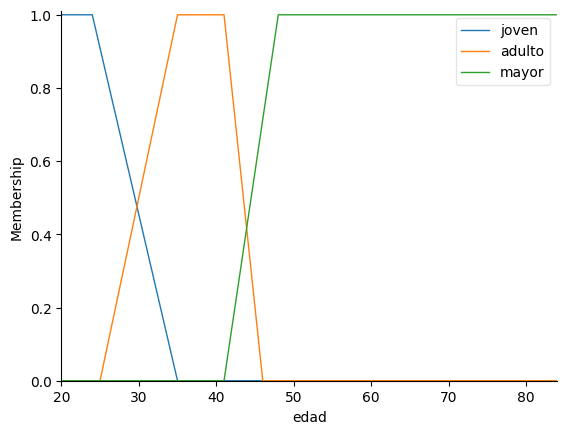

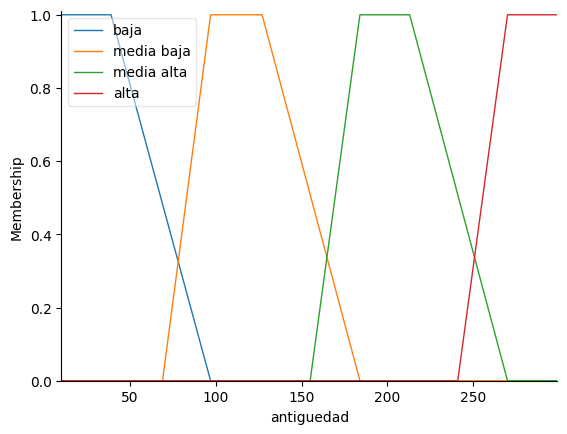

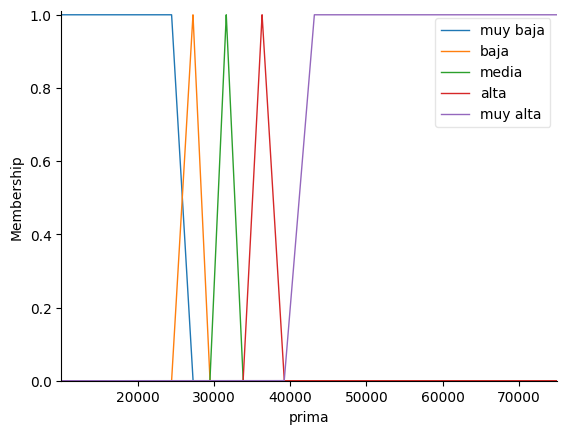

In [80]:
edad.view(sin = calcularPrima)
ant.view(sin = calcularPrima)
prima.view(sin = calcularPrima)